##No 1

Link: https://binusianorg-my.sharepoint.com/personal/johnny_binus_ac_id/_layouts/15/guestaccess.aspx?docid=05251066f5a414c5fa53e37c552403f25&authkey=ARGkV_hJ_qUEhhC84gD_3O0&e=eM38IS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from google.colab import drive
import tensorflow
import keras
from keras.models import Sequential
from keras import layers
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.layers import GRU
from keras.regularizers import l2
from keras.optimizers import SGD

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###APPL

####EDA

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/UAS Deep Learning/AAPL.csv')
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400


In [ ]:
df1 = df1[['Date', 'Close']]
df1.head()

,Date,Close
0,1980-12-12,0.513393
1,1980-12-15,0.486607
2,1980-12-16,0.450893
3,1980-12-17,0.462054
4,1980-12-18,0.475446


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9909 entries, 0 to 9908
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9909 non-null   object 
 1   Close   9909 non-null   float64
dtypes: float64(1), object(1)
memory usage: 155.0+ KB


In [ ]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Close,9909.0,32.61803,58.471899,0.196429,1.071429,1.732143,35.761429,327.200012


In [ ]:
print(df1.isna().sum())
df1.shape

Date     0
Close    0
dtype: int64


(9909, 2)

####preprocessing

[  0.51339287   0.48660713   0.45089287 ... 254.80999756 254.28999329
 240.91000366]


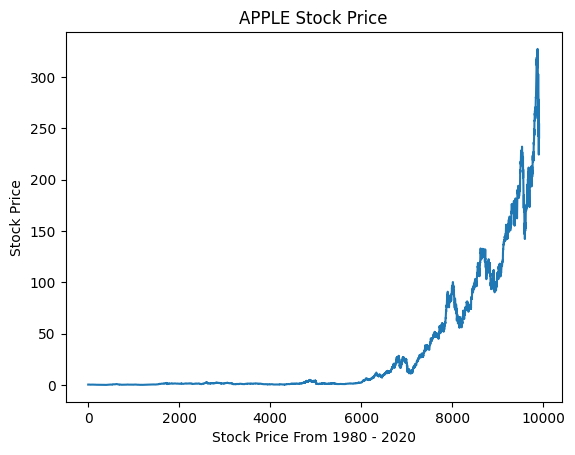

In [ ]:
df1_plot = df1.iloc[:,1].values
print(df1_plot)
plt.plot(df1_plot)
plt.xlabel("Stock Price From 1980 - 2020")
plt.ylabel("Stock Price")
plt.title("APPLE Stock Price")
plt.show()

In [ ]:
df1_close = df1['Close'].values
df1_close

array([  0.51339287,   0.48660713,   0.45089287, ..., 254.80999756,
       254.28999329, 240.91000366])

In [ ]:
df1_data = df1_close.reshape(-1,1)
df1_data.shape

(9909, 1)

In [ ]:
scaler = MinMaxScaler(feature_range = (0,1))
df1_data = scaler.fit_transform(df1_data)

In [ ]:
# Define window size and horizon
WINDOW_SIZE = 5
HORIZON = 1
# Create empty lists for input and output data
X = []
y = []

for i in range(len(df1_data) - WINDOW_SIZE - HORIZON + 1):
    df1_input_window = df1_data[i:i + WINDOW_SIZE]
    df1_output_window = df1_data[i + WINDOW_SIZE + HORIZON - 1]
    X.append(df1_input_window)
    y.append(df1_output_window)

X = np.array(X)
y = np.array(y)

print("Input data:")
print(X)
print("Output data:")
print(y)

Input data:
[[[9.69299159e-04]
  [8.87386505e-04]
  [7.78169755e-04]
  [8.12299966e-04]
  [8.53256293e-04]]

 [[8.87386505e-04]
  [7.78169755e-04]
  [8.12299966e-04]
  [8.53256293e-04]
  [9.41994880e-04]]

 [[7.78169755e-04]
  [8.12299966e-04]
  [8.53256293e-04]
  [9.41994880e-04]
  [1.01708151e-03]]

 ...

 [[6.85538562e-01]
  [7.54375758e-01]
  [7.50216780e-01]
  [7.89727045e-01]
  [7.57005701e-01]]

 [[7.54375758e-01]
  [7.50216780e-01]
  [7.89727045e-01]
  [7.57005701e-01]
  [7.78626234e-01]]

 [[7.50216780e-01]
  [7.89727045e-01]
  [7.57005701e-01]
  [7.78626234e-01]
  [7.77036025e-01]]]
Output data:
[[0.00094199]
 [0.00101708]
 [0.00108534]
 ...
 [0.77862623]
 [0.77703602]
 [0.73611907]]


In [ ]:
df1_train_size = int(len(X) * 0.8)
df1_val_size = int(len(X) * 0.1)
df1_test_size = len(X) - df1_train_size - df1_val_size

df1_train_input = X[:df1_train_size]
df1_train_output = y[:df1_train_size]
df1_val_input = X[df1_train_size : df1_train_size + df1_val_size]
df1_val_output = y[df1_train_size : df1_train_size+ df1_val_size]
df1_test_input = X[df1_train_size + df1_val_size:]
df1_test_output = y[df1_train_size + df1_val_size:]

print("Train size: {}, Val size: {}, Test size: {}".format(len(df1_train_input), len(df1_val_input), len(df1_test_input)))

Train size: 7923, Val size: 990, Test size: 991


#### arsitektur baseline

Epoch 1/10
317/317 - 7s - loss: 1.8417e-04 - 7s/epoch - 23ms/step
Epoch 2/10
317/317 - 5s - loss: 2.6055e-06 - 5s/epoch - 15ms/step
Epoch 3/10
317/317 - 3s - loss: 2.6672e-06 - 3s/epoch - 8ms/step
Epoch 4/10
317/317 - 3s - loss: 2.4183e-06 - 3s/epoch - 8ms/step
Epoch 5/10
317/317 - 3s - loss: 2.4982e-06 - 3s/epoch - 9ms/step
Epoch 6/10
317/317 - 3s - loss: 2.6380e-06 - 3s/epoch - 9ms/step
Epoch 7/10
317/317 - 3s - loss: 2.6699e-06 - 3s/epoch - 8ms/step
Epoch 8/10
317/317 - 3s - loss: 2.6709e-06 - 3s/epoch - 8ms/step
Epoch 9/10
317/317 - 3s - loss: 3.1831e-06 - 3s/epoch - 8ms/step
Epoch 10/10
317/317 - 3s - loss: 2.8031e-06 - 3s/epoch - 9ms/step
31/31 [==============================] - 0s 3ms/step
RMSE: 0.07731258689055132
MAE: 0.07008021130478978
MAPE: 12.393961070212415


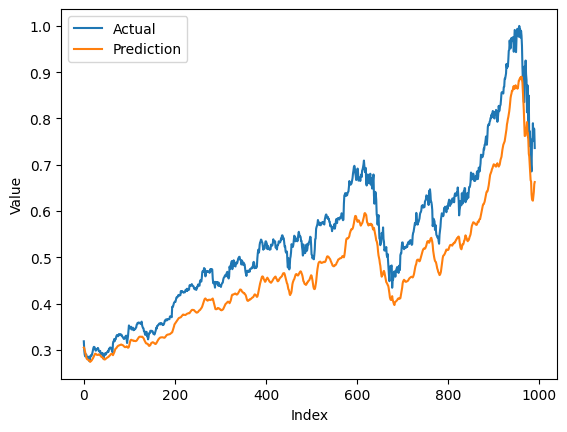

In [ ]:
# Creating the baseline for LSTM model
K.clear_session()
baseline_model = Sequential()
baseline_model.add(LSTM(units=50, activation='relu', input_shape=(WINDOW_SIZE, 1)))
baseline_model.add(Dense(1))
baseline_model.compile(optimizer='adam', loss='mean_squared_error')
history = baseline_model.fit(df1_train_input, df1_train_output, epochs=10, batch_size=25, verbose=2)

predict = baseline_model.predict(df1_test_input)

rmse = np.sqrt(mean_squared_error(df1_test_output, predict))
mae = mean_absolute_error(df1_test_output, predict)
mape = np.mean(np.abs((df1_test_output - predict) / df1_test_output)) * 100

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

plt.plot(df1_test_output, label="Actual")
plt.plot(predict, label="Prediction")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()

####Model 1

Epoch 1/50
317/317 - 5s - loss: 1.1723e-04 - 5s/epoch - 17ms/step
Epoch 2/50
317/317 - 3s - loss: 1.9276e-06 - 3s/epoch - 11ms/step
Epoch 3/50
317/317 - 4s - loss: 2.1019e-06 - 4s/epoch - 12ms/step
Epoch 4/50
317/317 - 4s - loss: 2.5902e-06 - 4s/epoch - 11ms/step
Epoch 5/50
317/317 - 4s - loss: 2.0337e-06 - 4s/epoch - 12ms/step
Epoch 6/50
317/317 - 3s - loss: 2.1200e-06 - 3s/epoch - 11ms/step
Epoch 7/50
317/317 - 4s - loss: 2.3844e-06 - 4s/epoch - 11ms/step
Epoch 8/50
317/317 - 3s - loss: 2.2435e-06 - 3s/epoch - 10ms/step
Epoch 9/50
317/317 - 3s - loss: 2.4149e-06 - 3s/epoch - 10ms/step
Epoch 10/50
317/317 - 3s - loss: 2.1668e-06 - 3s/epoch - 11ms/step
Epoch 11/50
317/317 - 4s - loss: 1.9520e-06 - 4s/epoch - 12ms/step
Epoch 12/50
317/317 - 4s - loss: 1.9926e-06 - 4s/epoch - 12ms/step
Epoch 13/50
317/317 - 5s - loss: 2.2722e-06 - 5s/epoch - 15ms/step
Epoch 14/50
317/317 - 4s - loss: 2.1309e-06 - 4s/epoch - 14ms/step
Epoch 15/50
317/317 - 3s - loss: 2.0243e-06 - 3s/epoch - 10ms/step
Epoc

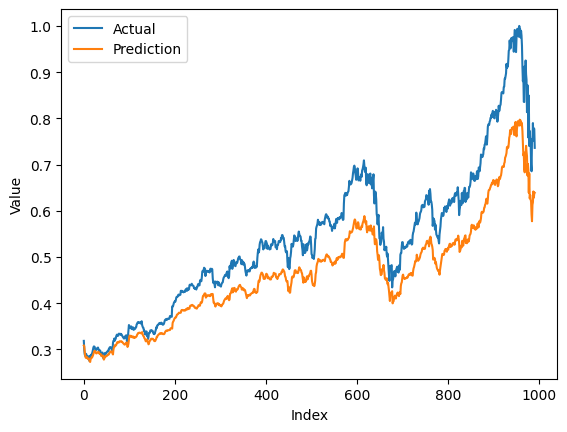

In [ ]:
K.clear_session()
gru_model = Sequential()
gru_model.add(GRU(units=50, activation='relu', input_shape=(WINDOW_SIZE, 1)))
gru_model.add(Dense(1))
gru_model.compile(optimizer='adam', loss='mean_squared_error')
history1 = gru_model.fit(df1_train_input, df1_train_output, epochs=50, batch_size=25, verbose=2)

predict = gru_model.predict(df1_test_input)

rmse1 = np.sqrt(mean_squared_error(df1_test_output, predict))
mae1 = mean_absolute_error(df1_test_output, predict)
mape1 = np.mean(np.abs((df1_test_output - predict) / df1_test_output)) * 100

print("RMSE:", rmse1)
print("MAE:", mae1)
print("MAPE:", mape1)

plt.plot(df1_test_output, label="Actual")
plt.plot(predict, label="Prediction")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()

####Model 2

Epoch 1/50
159/159 - 4s - loss: 2.8038e-04 - 4s/epoch - 23ms/step
Epoch 2/50
159/159 - 2s - loss: 4.7124e-05 - 2s/epoch - 11ms/step
Epoch 3/50
159/159 - 2s - loss: 4.2591e-05 - 2s/epoch - 11ms/step
Epoch 4/50
159/159 - 2s - loss: 5.0445e-05 - 2s/epoch - 12ms/step
Epoch 5/50
159/159 - 2s - loss: 4.3683e-05 - 2s/epoch - 12ms/step
Epoch 6/50
159/159 - 2s - loss: 4.2647e-05 - 2s/epoch - 11ms/step
Epoch 7/50
159/159 - 2s - loss: 4.5266e-05 - 2s/epoch - 11ms/step
Epoch 8/50
159/159 - 2s - loss: 4.1897e-05 - 2s/epoch - 11ms/step
Epoch 9/50
159/159 - 2s - loss: 3.7039e-05 - 2s/epoch - 10ms/step
Epoch 10/50
159/159 - 2s - loss: 4.3839e-05 - 2s/epoch - 10ms/step
Epoch 11/50
159/159 - 2s - loss: 4.4001e-05 - 2s/epoch - 11ms/step
Epoch 12/50
159/159 - 2s - loss: 3.8405e-05 - 2s/epoch - 12ms/step
Epoch 13/50
159/159 - 2s - loss: 4.0485e-05 - 2s/epoch - 11ms/step
Epoch 14/50
159/159 - 2s - loss: 4.1206e-05 - 2s/epoch - 10ms/step
Epoch 15/50
159/159 - 2s - loss: 4.0560e-05 - 2s/epoch - 10ms/step
Epoc

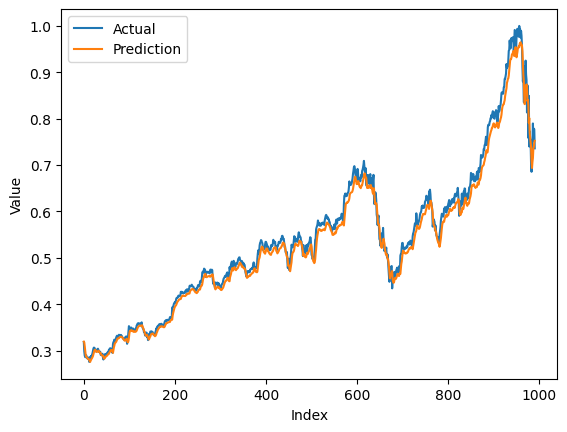

In [ ]:
# ditambah dropout, batch_size=50,
K.clear_session()
gru_model = Sequential()
gru_model.add(GRU(units=50, activation='relu', input_shape=(WINDOW_SIZE, 1)))
gru_model.add(Dropout(0.2))
gru_model.add(Dense(1))
gru_model.compile(optimizer='adam', loss='mean_squared_error')
history2 = gru_model.fit(df1_train_input, df1_train_output, epochs=50, batch_size=50, verbose=2)

predict = gru_model.predict(df1_test_input)

rmse2 = np.sqrt(mean_squared_error(df1_test_output, predict))
mae2 = mean_absolute_error(df1_test_output, predict)
mape2 = np.mean(np.abs((df1_test_output - predict) / df1_test_output)) * 100

print("RMSE:", rmse2)
print("MAE:", mae2)
print("MAPE:", mape2)

plt.plot(df1_test_output, label="Actual")
plt.plot(predict, label="Prediction")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()

####Model 3

Epoch 1/50
159/159 - 3s - loss: 1.9619e-04 - 3s/epoch - 17ms/step
Epoch 2/50
159/159 - 0s - loss: 3.1143e-05 - 477ms/epoch - 3ms/step
Epoch 3/50
159/159 - 0s - loss: 2.6992e-05 - 480ms/epoch - 3ms/step
Epoch 4/50
159/159 - 0s - loss: 2.1301e-05 - 480ms/epoch - 3ms/step
Epoch 5/50
159/159 - 0s - loss: 1.6731e-05 - 477ms/epoch - 3ms/step
Epoch 6/50
159/159 - 0s - loss: 1.4672e-05 - 475ms/epoch - 3ms/step
Epoch 7/50
159/159 - 0s - loss: 1.5526e-05 - 474ms/epoch - 3ms/step
Epoch 8/50
159/159 - 0s - loss: 1.4273e-05 - 482ms/epoch - 3ms/step
Epoch 9/50
159/159 - 0s - loss: 1.3610e-05 - 479ms/epoch - 3ms/step
Epoch 10/50
159/159 - 0s - loss: 1.3695e-05 - 480ms/epoch - 3ms/step
Epoch 11/50
159/159 - 0s - loss: 1.3320e-05 - 474ms/epoch - 3ms/step
Epoch 12/50
159/159 - 0s - loss: 1.2124e-05 - 478ms/epoch - 3ms/step
Epoch 13/50
159/159 - 0s - loss: 1.2886e-05 - 496ms/epoch - 3ms/step
Epoch 14/50
159/159 - 1s - loss: 1.3869e-05 - 563ms/epoch - 4ms/step
Epoch 15/50
159/159 - 1s - loss: 1.1353e-05 -

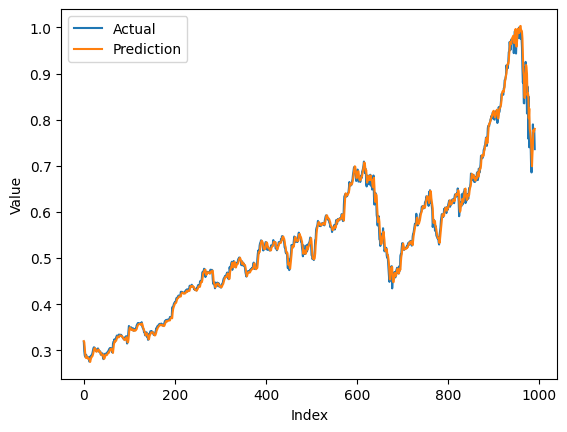

In [ ]:
# tanh, batch_size=50, epoch=50
K.clear_session()
gru_model = Sequential()
gru_model.add(GRU(units=50, activation='tanh', input_shape=(WINDOW_SIZE, 1)))
gru_model.add(Dropout(0.2))
gru_model.add(Dense(1))
gru_model.compile(optimizer="adam", loss='mean_squared_error')
history3 = gru_model.fit(df1_train_input, df1_train_output, epochs=50, batch_size=50, verbose=2)

predict = gru_model.predict(df1_test_input)

rmse3 = np.sqrt(mean_squared_error(df1_test_output, predict))
mae3 = mean_absolute_error(df1_test_output, predict)
mape3 = np.mean(np.abs((df1_test_output - predict) / df1_test_output)) * 100

print("RMSE:", rmse3)
print("MAE:", mae3)
print("MAPE:", mape3)

plt.plot(df1_test_output, label="Actual")
plt.plot(predict, label="Prediction")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()

Kesimpulan yang saya dapatkan bahwa menggunakan tanh jauh lebih baik karena tanh lebih kompleks perhitungannya dibandingkan dengan relu. Saya juga mencoba menggunakan sigmoid, tetapi sigmoid masih kalah dengan tanh.
selain itu, menggunakan GRU juga meningkatkan performa menjadi lebih baik, walaupun harus di ganti juga untuk activation dan batch_sizenya.
batch_size yang baik di angka 50, jika ambil 25 maka kurang kompleks, tetapi jika ambil diangka 128 maka terlalu kompleks sehingga hasilnya juga kurang bagus
Kemudian optimizer terbaik adalah adam, saya sudah mencoba berbagai optimizer, tetapi hanya adam yang paling bagus

####evaluate

In [ ]:
print('Baseline Model:')
print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)
print('\n')
print('Model 1:')
print("RMSE:", rmse1)
print("MAE:", mae1)
print("MAPE:", mape1)
print('\n')
print('Model 2:')
print("RMSE:", rmse2)
print("MAE:", mae2)
print("MAPE:", mape2)
print('\n')
print('Model 3:')
print("RMSE:", rmse3)
print("MAE:", mae3)
print("MAPE:", mape3)

Baseline Model:
RMSE: 0.07731258689055132
MAE: 0.07008021130478978
MAPE: 12.393961070212415


Model 1:
RMSE: 0.08514109412593952
MAE: 0.07226829532547198
MAPE: 12.138970539801864


Model 2:
RMSE: 0.018855235738139003
MAE: 0.01476017694101913
MAPE: 2.561682472084528


Model 3:
RMSE: 0.012134128011159671
MAE: 0.007500955928248172
MAPE: 1.342282242079041


###AMD

####EDA

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/UAS Deep Learning/AMD.csv')
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.0,3.302083,3.125000,3.145833,3.145833,219600
1,1980-03-18,0.0,3.125000,2.937500,3.031250,3.031250,727200
2,1980-03-19,0.0,3.083333,3.020833,3.041667,3.041667,295200
3,1980-03-20,0.0,3.062500,3.010417,3.010417,3.010417,159600
4,1980-03-21,0.0,3.020833,2.906250,2.916667,2.916667,130800


In [ ]:
df2 = df2[['Date', 'Close']]
df2.head()

,Date,Close
0,1980-03-17,3.145833
1,1980-03-18,3.031250
2,1980-03-19,3.041667
3,1980-03-20,3.010417
4,1980-03-21,2.916667


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10098 entries, 0 to 10097
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    10098 non-null  object 
 1   Close   10098 non-null  float64
dtypes: float64(1), object(1)
memory usage: 157.9+ KB


In [ ]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Close,10098.0,11.210802,8.283645,1.62,4.9375,9.0625,14.7075,58.900002


In [ ]:
print(df2.isna().sum())
df2.shape

Date     0
Close    0
dtype: int64


(10098, 2)

####preprocessing

[ 3.14583325  3.03125     3.04166675 ... 47.86000061 45.47999954
 43.65999985]


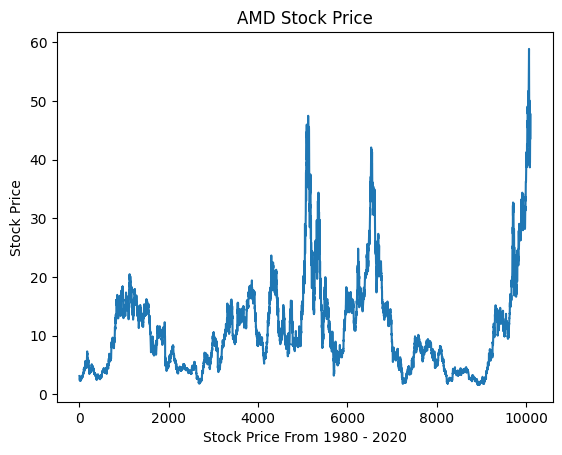

In [ ]:
df2_plot = df2.iloc[:,1].values
print(df2_plot)
plt.plot(df2_plot)
plt.xlabel("Stock Price From 1980 - 2020")
plt.ylabel("Stock Price")
plt.title("AMD Stock Price")
plt.show()

In [ ]:
df2_close = df2['Close'].values
df2_close

array([ 3.14583325,  3.03125   ,  3.04166675, ..., 47.86000061,
       45.47999954, 43.65999985])

In [ ]:
df2_data = df2_close.reshape(-1,1)
df2_data.shape

(10098, 1)

In [ ]:
scaler = MinMaxScaler(feature_range = (0,1))
df2_data = scaler.fit_transform(df2_data)

In [ ]:
# Define window size and horizon
WINDOW_SIZE = 5
HORIZON = 1
# Create empty lists for input and output data
X = []
y = []

for i in range(len(df2_data) - WINDOW_SIZE - HORIZON + 1):
    df2_input_window = df2_data[i:i + WINDOW_SIZE]
    df2_output_window = df2_data[i + WINDOW_SIZE + HORIZON - 1]
    X.append(df2_input_window)
    y.append(df2_output_window)

X = np.array(X)
y = np.array(y)

print("Input data:")
print(X)
print("Output data:")
print(y)

Input data:
[[[0.02663815]
  [0.02463774]
  [0.0248196 ]
  [0.02427403]
  [0.02263734]]

 [[0.02463774]
  [0.0248196 ]
  [0.02427403]
  [0.02263734]
  [0.01827281]]

 [[0.0248196 ]
  [0.02427403]
  [0.02263734]
  [0.01827281]
  [0.01718168]]

 ...

 [[0.69867316]
  [0.77863129]
  [0.7508729 ]
  [0.80097763]
  [0.78491621]]

 [[0.77863129]
  [0.7508729 ]
  [0.80097763]
  [0.78491621]
  [0.80726256]]

 [[0.7508729 ]
  [0.80097763]
  [0.78491621]
  [0.80726256]
  [0.76571226]]]
Output data:
[[0.01827281]
 [0.01718168]
 [0.01445385]
 ...
 [0.80726256]
 [0.76571226]
 [0.73393853]]


In [ ]:
df2_train_size = int(len(X) * 0.8)
df2_val_size = int(len(X) * 0.1)
df2_test_size = len(X) - df2_train_size - df2_val_size

df2_train_input = X[:df2_train_size]
df2_train_output = y[:df2_train_size]
df2_val_input = X[df2_train_size : df2_train_size + df2_val_size]
df2_val_output = y[df2_train_size : df2_train_size+ df2_val_size]
df2_test_input = X[df2_train_size + df2_val_size:]
df2_test_output = y[df2_train_size + df2_val_size:]

print("Train size: {}, Val size: {}, Test size: {}".format(len(df2_train_input), len(df2_val_input), len(df2_test_input)))

Train size: 8074, Val size: 1009, Test size: 1010


####arsitektur baseline

Epoch 1/10
323/323 - 4s - loss: 0.0028 - 4s/epoch - 14ms/step
Epoch 2/10
323/323 - 3s - loss: 1.8824e-04 - 3s/epoch - 9ms/step
Epoch 3/10
323/323 - 3s - loss: 1.8761e-04 - 3s/epoch - 10ms/step
Epoch 4/10
323/323 - 3s - loss: 1.8061e-04 - 3s/epoch - 8ms/step
Epoch 5/10
323/323 - 3s - loss: 1.6793e-04 - 3s/epoch - 8ms/step
Epoch 6/10
323/323 - 3s - loss: 1.5932e-04 - 3s/epoch - 8ms/step
Epoch 7/10
323/323 - 3s - loss: 1.5447e-04 - 3s/epoch - 8ms/step
Epoch 8/10
323/323 - 3s - loss: 1.4757e-04 - 3s/epoch - 9ms/step
Epoch 9/10
323/323 - 3s - loss: 1.4174e-04 - 3s/epoch - 8ms/step
Epoch 10/10
323/323 - 3s - loss: 1.2740e-04 - 3s/epoch - 8ms/step
32/32 [==============================] - 0s 2ms/step
RMSE: 0.017865297357231583
MAE: 0.01136401104758976
MAPE: 4.117691578335568


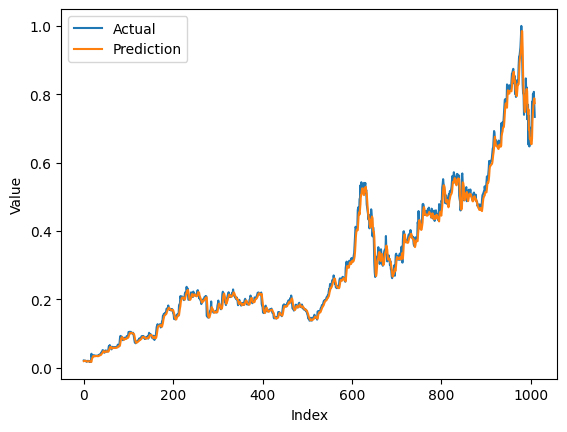

In [ ]:
# Creating the baseline for LSTM model
K.clear_session()
baseline_model = Sequential()
baseline_model.add(LSTM(units=50, activation='relu', input_shape=(WINDOW_SIZE, 1)))
baseline_model.add(Dense(1))
baseline_model.compile(optimizer='adam', loss='mean_squared_error')
history_2 = baseline_model.fit(df2_train_input, df2_train_output, epochs=10, batch_size=25, verbose=2)

predict = baseline_model.predict(df2_test_input)

rmse = np.sqrt(mean_squared_error(df2_test_output, predict))
mae = mean_absolute_error(df2_test_output, predict)
mape = np.mean(np.abs((df2_test_output - predict) / df2_test_output)) * 100

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

plt.plot(df2_test_output, label="Actual")
plt.plot(predict, label="Prediction")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()

####Model 1

Epoch 1/50
323/323 - 5s - loss: 0.0018 - 5s/epoch - 16ms/step
Epoch 2/50
323/323 - 5s - loss: 1.3886e-04 - 5s/epoch - 16ms/step
Epoch 3/50
323/323 - 3s - loss: 1.2890e-04 - 3s/epoch - 10ms/step
Epoch 4/50
323/323 - 3s - loss: 1.2732e-04 - 3s/epoch - 10ms/step
Epoch 5/50
323/323 - 3s - loss: 1.2190e-04 - 3s/epoch - 11ms/step
Epoch 6/50
323/323 - 4s - loss: 1.1046e-04 - 4s/epoch - 12ms/step
Epoch 7/50
323/323 - 3s - loss: 1.0937e-04 - 3s/epoch - 10ms/step
Epoch 8/50
323/323 - 3s - loss: 1.1184e-04 - 3s/epoch - 10ms/step
Epoch 9/50
323/323 - 4s - loss: 1.0037e-04 - 4s/epoch - 11ms/step
Epoch 10/50
323/323 - 4s - loss: 1.0480e-04 - 4s/epoch - 11ms/step
Epoch 11/50
323/323 - 3s - loss: 1.0248e-04 - 3s/epoch - 10ms/step
Epoch 12/50
323/323 - 3s - loss: 9.5778e-05 - 3s/epoch - 10ms/step
Epoch 13/50
323/323 - 4s - loss: 9.6254e-05 - 4s/epoch - 11ms/step
Epoch 14/50
323/323 - 4s - loss: 9.3215e-05 - 4s/epoch - 11ms/step
Epoch 15/50
323/323 - 3s - loss: 9.3576e-05 - 3s/epoch - 11ms/step
Epoch 16

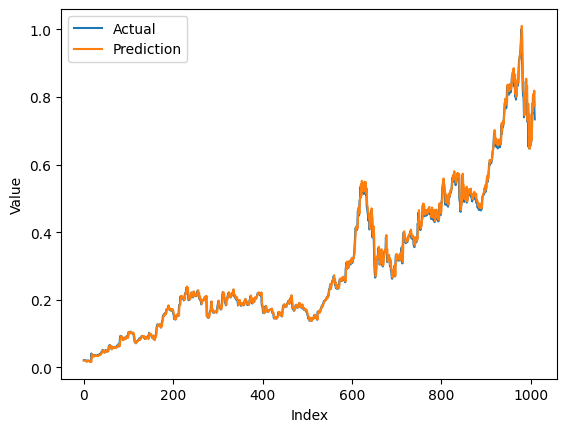

In [ ]:
K.clear_session()
gru_model = Sequential()
gru_model.add(GRU(units=50, activation='relu', input_shape=(WINDOW_SIZE, 1)))
gru_model.add(Dense(1))
gru_model.compile(optimizer='adam', loss='mean_squared_error')
history1_2 = gru_model.fit(df2_train_input, df2_train_output, epochs=50, batch_size=25, verbose=2)

predict = gru_model.predict(df2_test_input)

rmse1 = np.sqrt(mean_squared_error(df2_test_output, predict))
mae1 = mean_absolute_error(df2_test_output, predict)
mape1 = np.mean(np.abs((df2_test_output - predict) / df2_test_output)) * 100

print("RMSE:", rmse1)
print("MAE:", mae1)
print("MAPE:", mape1)

plt.plot(df2_test_output, label="Actual")
plt.plot(predict, label="Prediction")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()

####Model 2

Epoch 1/50
162/162 - 4s - loss: 0.0055 - 4s/epoch - 22ms/step
Epoch 2/50
162/162 - 2s - loss: 8.0466e-04 - 2s/epoch - 11ms/step
Epoch 3/50
162/162 - 2s - loss: 6.9060e-04 - 2s/epoch - 12ms/step
Epoch 4/50
162/162 - 2s - loss: 6.3151e-04 - 2s/epoch - 13ms/step
Epoch 5/50
162/162 - 2s - loss: 5.4205e-04 - 2s/epoch - 11ms/step
Epoch 6/50
162/162 - 2s - loss: 5.6805e-04 - 2s/epoch - 12ms/step
Epoch 7/50
162/162 - 2s - loss: 5.3077e-04 - 2s/epoch - 11ms/step
Epoch 8/50
162/162 - 2s - loss: 5.3268e-04 - 2s/epoch - 11ms/step
Epoch 9/50
162/162 - 2s - loss: 4.8614e-04 - 2s/epoch - 11ms/step
Epoch 10/50
162/162 - 2s - loss: 5.0371e-04 - 2s/epoch - 11ms/step
Epoch 11/50
162/162 - 2s - loss: 4.6202e-04 - 2s/epoch - 10ms/step
Epoch 12/50
162/162 - 2s - loss: 4.7859e-04 - 2s/epoch - 11ms/step
Epoch 13/50
162/162 - 2s - loss: 4.6775e-04 - 2s/epoch - 12ms/step
Epoch 14/50
162/162 - 2s - loss: 4.6583e-04 - 2s/epoch - 11ms/step
Epoch 15/50
162/162 - 2s - loss: 4.4339e-04 - 2s/epoch - 10ms/step
Epoch 16

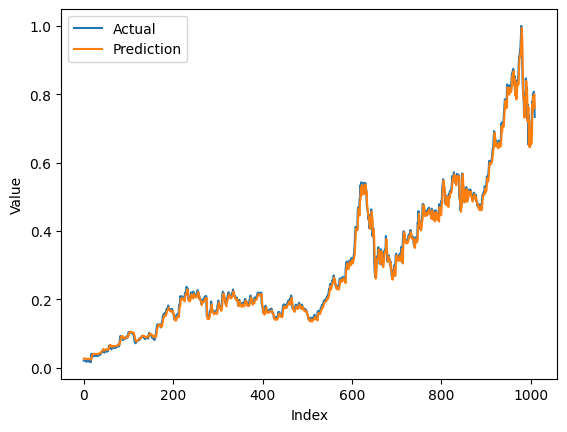

In [ ]:
# ditambah dropout, batch_size=50,
K.clear_session()
gru_model = Sequential()
gru_model.add(GRU(units=50, activation='relu', input_shape=(WINDOW_SIZE, 1)))
gru_model.add(Dropout(0.2))
gru_model.add(Dense(1))
gru_model.compile(optimizer='adam', loss='mean_squared_error')
history2_2 = gru_model.fit(df2_train_input, df2_train_output, epochs=50, batch_size=50, verbose=2)

predict = gru_model.predict(df2_test_input)

rmse2 = np.sqrt(mean_squared_error(df2_test_output, predict))
mae2 = mean_absolute_error(df2_test_output, predict)
mape2 = np.mean(np.abs((df2_test_output - predict) / df2_test_output)) * 100

print("RMSE:", rmse2)
print("MAE:", mae2)
print("MAPE:", mape2)

plt.plot(df2_test_output, label="Actual")
plt.plot(predict, label="Prediction")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()

####Model 3

Epoch 1/50
162/162 - 2s - loss: 0.0022 - 2s/epoch - 15ms/step
Epoch 2/50
162/162 - 1s - loss: 4.9291e-04 - 500ms/epoch - 3ms/step
Epoch 3/50
162/162 - 0s - loss: 4.0932e-04 - 490ms/epoch - 3ms/step
Epoch 4/50
162/162 - 0s - loss: 3.6932e-04 - 484ms/epoch - 3ms/step
Epoch 5/50
162/162 - 0s - loss: 3.4449e-04 - 486ms/epoch - 3ms/step
Epoch 6/50
162/162 - 0s - loss: 2.9941e-04 - 493ms/epoch - 3ms/step
Epoch 7/50
162/162 - 0s - loss: 2.6864e-04 - 487ms/epoch - 3ms/step
Epoch 8/50
162/162 - 0s - loss: 2.6416e-04 - 490ms/epoch - 3ms/step
Epoch 9/50
162/162 - 0s - loss: 2.5879e-04 - 483ms/epoch - 3ms/step
Epoch 10/50
162/162 - 0s - loss: 2.4390e-04 - 485ms/epoch - 3ms/step
Epoch 11/50
162/162 - 0s - loss: 2.2239e-04 - 495ms/epoch - 3ms/step
Epoch 12/50
162/162 - 0s - loss: 2.3773e-04 - 496ms/epoch - 3ms/step
Epoch 13/50
162/162 - 1s - loss: 2.0745e-04 - 537ms/epoch - 3ms/step
Epoch 14/50
162/162 - 1s - loss: 2.0859e-04 - 543ms/epoch - 3ms/step
Epoch 15/50
162/162 - 1s - loss: 2.0220e-04 - 541

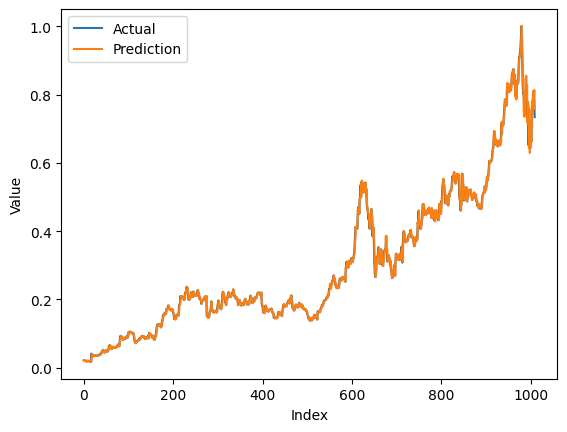

In [ ]:
# tanh, batch_size=50, epoch=50
K.clear_session()
gru_model = Sequential()
gru_model.add(GRU(units=50, activation='tanh', input_shape=(WINDOW_SIZE, 1)))
gru_model.add(Dropout(0.2))
gru_model.add(Dense(1))
gru_model.compile(optimizer="adam", loss='mean_squared_error')
history3_2 = gru_model.fit(df2_train_input, df2_train_output, epochs=50, batch_size=50, verbose=2)

predict = gru_model.predict(df2_test_input)

rmse3 = np.sqrt(mean_squared_error(df2_test_output, predict))
mae3 = mean_absolute_error(df2_test_output, predict)
mape3 = np.mean(np.abs((df2_test_output - predict) / df2_test_output)) * 100

print("RMSE:", rmse3)
print("MAE:", mae3)
print("MAPE:", mape3)

plt.plot(df2_test_output, label="Actual")
plt.plot(predict, label="Prediction")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()

####Evaluate

In [ ]:
print('Baseline Model:')
print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)
print('\n')
print('Model 1:')
print("RMSE:", rmse1)
print("MAE:", mae1)
print("MAPE:", mape1)
print('\n')
print('Model 2:')
print("RMSE:", rmse2)
print("MAE:", mae2)
print("MAPE:", mape2)
print('\n')
print('Model 3:')
print("RMSE:", rmse3)
print("MAE:", mae3)
print("MAPE:", mape3)

Baseline Model:
RMSE: 0.017865297357231583
MAE: 0.01136401104758976
MAPE: 4.117691578335568


Model 1:
RMSE: 0.01589495357747274
MAE: 0.009322865261659123
MAPE: 3.3536234178627935


Model 2:
RMSE: 0.016013674069518067
MAE: 0.01028293113300146
MAPE: 4.379210360725623


Model 3:
RMSE: 0.015741271313841645
MAE: 0.009134035177358554
MAPE: 3.2401388525123247
